In [1]:
import pandas as pd

# import data for bike rentals
rentals = pd.read_csv('../testing_methods/datasets/bike_sharing/day.csv')

# check dataframe
rentals

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# check if we have a good set of hidden variables
X = rentals[['temp', 'hum', 'windspeed', 'mnth']]
X = pd.get_dummies(X, columns=['mnth'])
y = rentals['weathersit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

# classify the data using logistic regression
logistic_regression = LogisticRegression(random_state=0).fit(X_train, y_train)
print('Train accuracy:', logistic_regression.score(X_train, y_train))
print('Test accuracy:', logistic_regression.score(X_test, y_test))

Train accuracy: 0.801094890510949
Test accuracy: 0.7540983606557377


In [3]:
from data_generation import get_bikes_data
from sklearn.svm import SVR

# now that we have data generating functions we can see how our data is structures
h, x, y  = get_bikes_data()

# see how well can we predict the rentals with the current vectors
labels = y['casual']
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.25, random_state=99)
svm = SVR().fit(x_train, y_train)
print('Train accuracy:', svm.score(x_train, y_train))
print('Test accuracy:', svm.score(x_test, y_test))

Train accuracy: 0.6229175819001236
Test accuracy: 0.6022196183234219


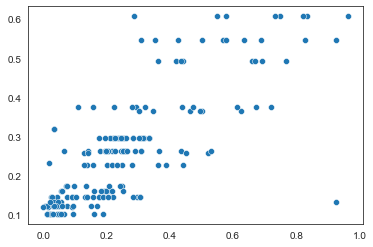

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

predicted = svm.predict(x_test).tolist()
ground_truth = y_test.tolist()

sns.set_style('white')
sns.scatterplot(x=ground_truth, y=predicted)

plt.show()